In [27]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

In [28]:

api_key = "5l7UGiymQz76YzAwdfHh3R1GbDYKfXV4eousM5Ml"
# lat, lng = 40.68439, -73.99566 # cnetroid of the shape NYC
lat, lng = 33.0665, -116.94 # cnetroid of the shape San diego
system_capacity = 0.25  # kW
losses = 14.08  # %
array_type = 1  # 0	Fixed - Open Rack
                # 1	Fixed - Roof Mounted
                # 2	1-Axis
                # 3	1-Axis Backtracking
                # 4	2-Axis
module_type = 0  # 0	Standard
                  # 1	Premium
                  # 2	Thin Film
tilt = 20  # degrees
azimuth = 180  # degrees
dc_ac_ratio = 1.2 # inverter loading ratio
inv_eff = 96.0  # inverter efficiency %
gcr=0.4  # ground coverage ratio
albedo = 0.3 # ground reflectance
use_wf_albedo = 0  # use weather file albedo	
bifaciality = 0  # bifaciality factor
soiling = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # monthly soiling losses %
timeframe = "hourly" # hourly or monthly
url = "https://developer.nrel.gov/api/pvwatts/v8.json?api_key=" + api_key +\
    "&azimuth=" + str(azimuth) +\
    "&system_capacity=" + str(system_capacity) +\
    "&losses=" + str(losses) +\
    "&array_type=" + str(array_type) +\
    "&module_type=" + str(module_type) +\
    "&gcr=" + str(gcr) +\
    "&dc_ac_ratio=" + str(dc_ac_ratio) +\
    "&inv_eff=" + str(inv_eff) +\
    "&radius=0" +\
    "&dataset=nsrdb" +\
    "&tilt=" + str(tilt) +\
    "&lat=" + str(lat) +\
    "&lon=" + str(lng) +\
    "&soiling="+ "|".join([str(i) for i in soiling]) +\
    "&bifaciality=" + str(bifaciality) +\
    "&use_wf_albedo=" + str(use_wf_albedo) +\
    "&timeframe="   + timeframe
    # "&albedo=" + str(albedo) +\
url

'https://developer.nrel.gov/api/pvwatts/v8.json?api_key=5l7UGiymQz76YzAwdfHh3R1GbDYKfXV4eousM5Ml&azimuth=180&system_capacity=0.25&losses=14.08&array_type=1&module_type=0&gcr=0.4&dc_ac_ratio=1.2&inv_eff=96.0&radius=0&dataset=nsrdb&tilt=20&lat=33.0665&lon=-116.94&soiling=0|0|0|0|0|0|0|0|0|0|0|0&bifaciality=0&use_wf_albedo=0&timeframe=hourly'

In [29]:
response = requests.get(url)
response_json = response.json()
# response_json.get('outputs')

In [30]:
df = pd.DataFrame({
    'month': range(1,13),
    'ac_monthly' : response_json.get('outputs').get('ac_monthly'),
    'poa_monthly' : response_json.get('outputs').get('poa_monthly'),
    'solrad_monthly' : response_json.get('outputs').get('solrad_monthly'),
    'dc_monthly' : response_json.get('outputs').get('dc_monthly'),
})
print('ac_annual:', response_json.get('outputs').get('ac_annual')) 
print('solrad_annual:', response_json.get('outputs').get('solrad_annual')) 
print('capacity_factor:', response_json.get('outputs').get('capacity_factor'))
print('ac_monthly sum:', df.get('ac_monthly').sum())
# df.plot(x='month', y=['ac_monthly', 'poa_monthly', 'solrad_monthly', 'dc_monthly'], kind='bar', figsize=(10,6))
df

ac_annual: 431.2610388972474
solrad_annual: 6.282298954118201
capacity_factor: 19.69228488115281
ac_monthly sum: 431.2610388972469


,month,ac_monthly,poa_monthly,solrad_monthly,dc_monthly
0,1,27.627262,138.997851,4.483802,28.869975
1,2,27.798553,142.051877,5.073281,29.036870
2,3,34.770446,182.497816,5.887026,36.335962
3,4,37.633428,199.611643,6.653721,39.313205
4,5,41.964144,225.017716,7.258636,43.824972
5,6,42.713013,233.340216,7.778007,44.603704
6,7,42.703330,234.082504,7.551049,44.600353
7,8,42.909156,236.819195,7.639329,44.802371
8,9,39.727855,217.214845,7.240495,41.468522
9,10,35.023989,188.380962,6.076805,36.572360


<Axes: xlabel='month'>

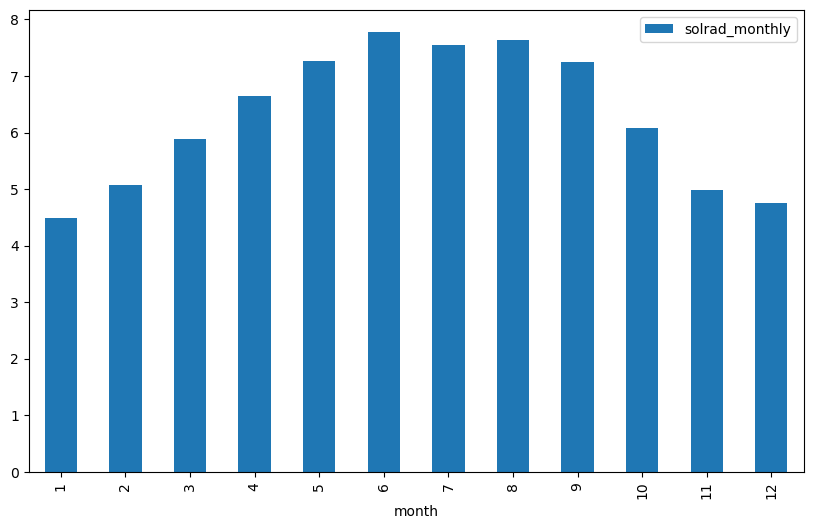

In [31]:
df.plot(x='month', y=['solrad_monthly'], kind='bar', figsize=(10,6))

In [32]:
table_name = "SDGE_2024" #sd station
area_svf_sum= 10580904544.35501

In [33]:
area_svf_sum

10580904544.35501

In [34]:
area = []
area_svf = []
with open('./ElectricLoadServingEntities_IOU_POU/zonal_stats.geojson', 'r') as f:
    data = json.load(f)
    for feature in data.get('features'):
        if feature.get('properties').get('area_svf') >0:
            area_svf.append(feature.get('properties').get('area_svf'))
            area.append(feature.get('properties').get('area'))
area_svf_sum = sum(area_svf)
print("area_svf",area_svf_sum)
print("area",sum(area))
print("reduction", 1-sum(area_svf)/sum(area))

area_svf 182626787.53999898
area 182798635.67999867
reduction 0.0009400953095761722


In [35]:
consumption = pd.read_csv('./Auxillary Data/monthly_district/' + table_name + '.csv')
consumption

,meter_id,date,reading
0,SDGE_EMS.T,2024-01-01,1.602715e+06
1,SDGE_EMS.T,2024-02-01,1.478189e+06
2,SDGE_EMS.T,2024-03-01,1.447043e+06
3,SDGE_EMS.T,2024-04-01,1.350484e+06
4,SDGE_EMS.T,2024-05-01,1.389233e+06
5,SDGE_EMS.T,2024-06-01,1.488496e+06
6,SDGE_EMS.T,2024-07-01,1.821744e+06
7,SDGE_EMS.T,2024-08-01,1.937150e+06
8,SDGE_EMS.T,2024-09-01,1.809502e+06
9,SDGE_EMS.T,2024-10-01,1.666601e+06


2.057744167564952


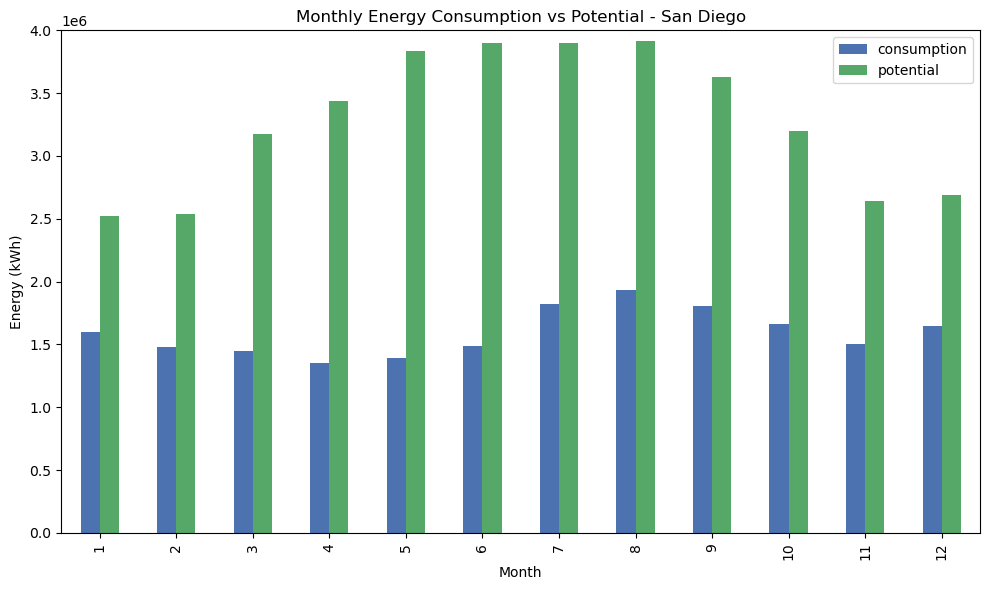

In [ ]:
# ac_monthly in kWh
df['consumption'] = consumption['reading']
df["potential"] = df['ac_monthly']*area_svf_sum*0.5*1e-3
# df.plot(x='month', y=['consumption','potential'], kind='bar', figsize=(10,6))
print(df['potential'].sum()/df['consumption'].sum())
df['potential']/df['consumption']

ax = df.plot(
    x='month',
    y=['consumption', 'potential'],
    kind='bar',
    figsize=(10,6),
    color=['#4C72B0', '#55A868']
)

ax.set_xlabel('Month')        # título del eje X
ax.set_ylabel('Energy (kWh)') # título del eje Y
ax.set_title('Monthly Energy Consumption vs Potential - San Diego')  # título general

ax.set_ylim(0, 4.0e6) 
plt.tight_layout()
plt.show()

In [37]:
# Horario: selecciona un día de verano y otro de invierno y grafica ambas curvas.

In [38]:
df = pd.DataFrame({
    'month': range(1,13),
    'ac_monthly' : response_json.get('outputs').get('ac_monthly'),
    'poa_monthly' : response_json.get('outputs').get('poa_monthly'),
    'solrad_monthly' : response_json.get('outputs').get('solrad_monthly'),
    'dc_monthly' : response_json.get('outputs').get('dc_monthly'),
})

In [39]:
#June 21st
jun_21_pot = [i * 0.5 * area_svf_sum * 1e-6 for i in response_json.get('outputs').get('ac')[4104:4128]]

# December 21st
dec_21_pot = [i * 0.5 * area_svf_sum * 1e-6 for i in response_json.get('outputs').get('ac')[8496:8520]]

In [40]:
hourly_consumption =pd.read_csv('./Auxillary Data/hourly_district/' + table_name + '.csv')['reading']
jun_21_con = hourly_consumption[4104:4128]
# December 21st
dec_21_con = hourly_consumption[8496:8520]

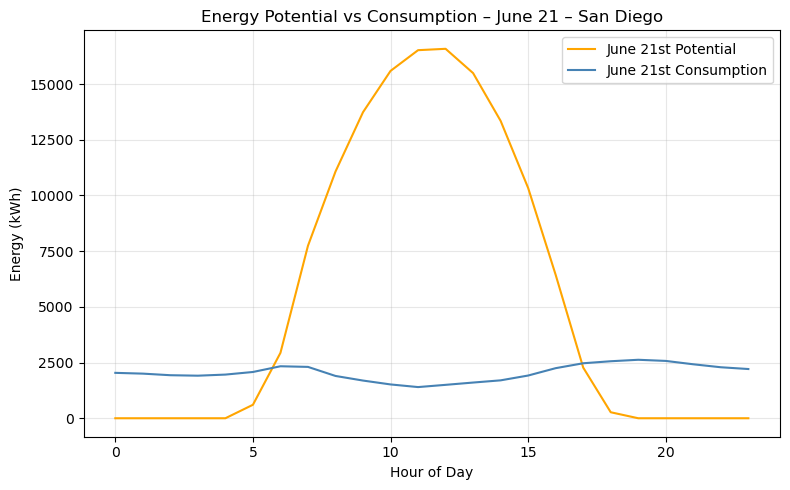

Solar coverage ratio: 2.70


In [41]:

plt.figure(figsize=(8,5))
plt.plot(range(24), jun_21_pot, label='June 21st Potential', color='orange')
plt.plot(range(24), jun_21_con, label='June 21st Consumption', color='steelblue')

plt.xlabel('Hour of Day')
plt.ylabel('Energy (kWh)')
plt.title('Energy Potential vs Consumption – June 21 – San Diego')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

ratio = sum(jun_21_pot) / sum(jun_21_con)
print(f"Solar coverage ratio: {ratio:.2f}")

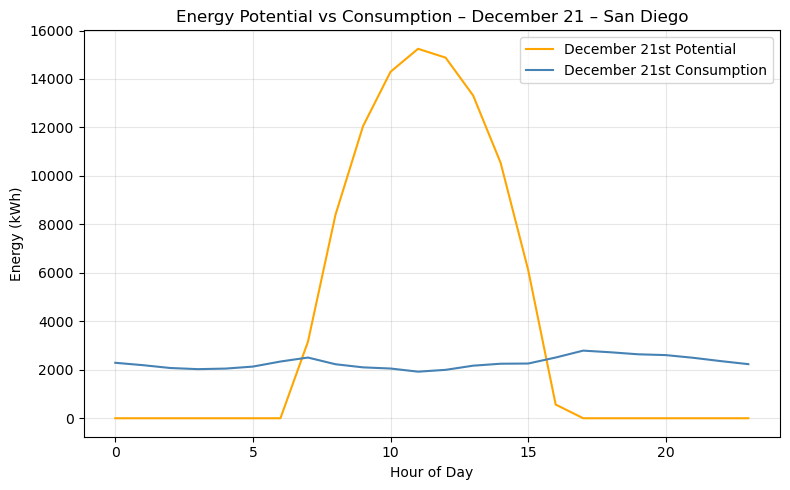

Solar coverage ratio (Dec 21): 1.79


In [42]:
plt.figure(figsize=(8,5))
plt.plot(range(24), dec_21_pot, label='December 21st Potential', color='orange')
plt.plot(range(24), dec_21_con, label='December 21st Consumption', color='steelblue')

plt.xlabel('Hour of Day')
plt.ylabel('Energy (kWh)')
plt.title('Energy Potential vs Consumption – December 21 – San Diego')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

ratio = sum(dec_21_pot) / sum(dec_21_con)
print(f"Solar coverage ratio (Dec 21): {ratio:.2f}")


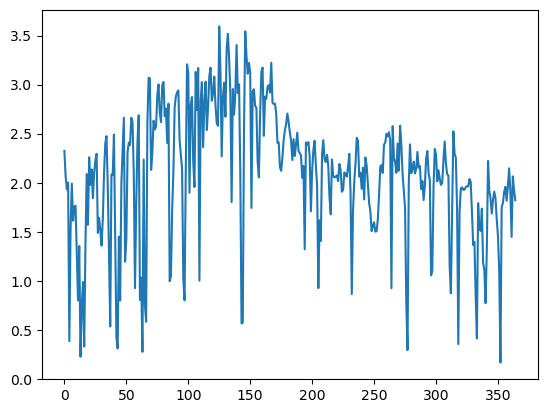

In [43]:
ratios =[]
for i in range(365):
    ratios.append(sum(0.5 * area_svf_sum * 1e-6 * np.array(response_json.get('outputs').get('ac')[i*24:i*24+24]))/sum(hourly_consumption[i*24:i*24+24]))

plt.plot(ratios)

(array([ 10.,  12.,  19.,  22.,  41., 104.,  73.,  43.,  34.,   7.]),
 array([0.16808146, 0.51049849, 0.85291552, 1.19533254, 1.53774957,
        1.8801666 , 2.22258362, 2.56500065, 2.90741768, 3.2498347 ,
        3.59225173]),
 <BarContainer object of 10 artists>)

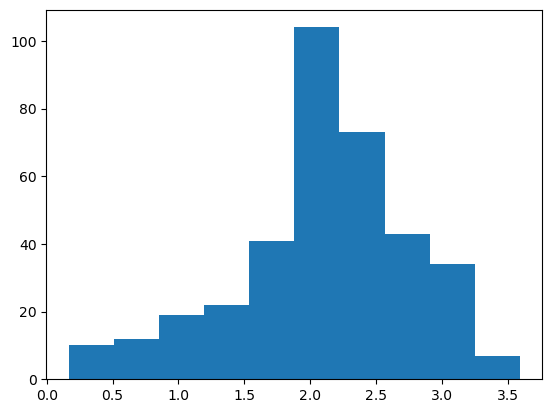

In [44]:
plt.hist(ratios) 